<a href="https://colab.research.google.com/github/VivianAI-Med/My-Portifolio/blob/main/Appendix_Diameter_vs_Hospital_Stay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo
ped_data = fetch_ucirepo(id=938)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

X = ped_data.data.features[['Appendix_Diameter']]
y = ped_data.data.features['Length_of_Stay']

imputer_X = SimpleImputer(strategy='most_frequent')
X_imputed = imputer_X.fit_transform(X)

Imputed_y = SimpleImputer(strategy='most_frequent')
y_imputed = Imputed_y.fit_transform(y.values.reshape(-1, 1))

model=LinearRegression()
model.fit(X_imputed, y_imputed)
w = slope = model.coef_[0][0]
b = intercept = model.intercept_[0]
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.29524023335479455
Intercept: 1.9601975648528671


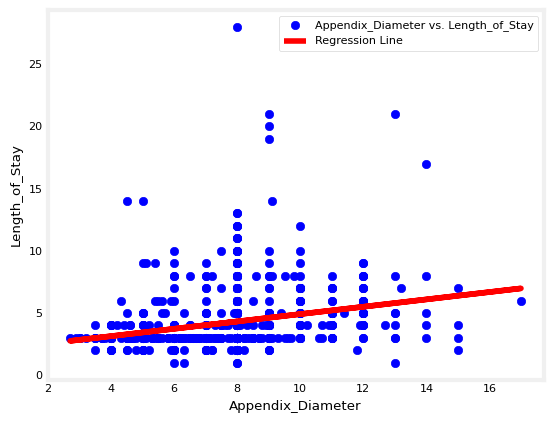

In [8]:
plt.scatter(X_imputed, y_imputed, color = 'blue', label = 'Appendix_Diameter vs. Length_of_Stay')
plt.plot(X_imputed, model.predict(X_imputed), color = 'red', label = 'Regression Line')
plt.xlabel('Appendix_Diameter')
plt.ylabel('Length_of_Stay')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


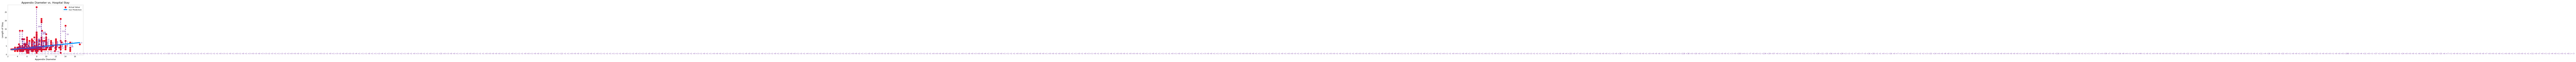

In [9]:
from lab_utils_uni import plt_house_x, mk_cost_lines
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,4))
f_wb = w * X_imputed.flatten() + b
# Plot actual vs prediction
plt_house_x(X_imputed.flatten(), y_imputed.flatten(), f_wb=f_wb, ax=ax)

# Add cost lines for illustration
mk_cost_lines(X_imputed.flatten(), y_imputed.flatten(), w, b, ax)
plt.title('Appendix Diameter vs. Hospital Stay')
plt.xlabel('Appendix Diameter')
plt.ylabel('Length of Stay')
plt.show()